In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile

zip_path = '/content/drive/MyDrive/ProdigyInfotech1/leapgestrecog.zip'
extract_path = '/content/leapgestrecog'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset Unzipped Successfully!")

✅ Dataset Unzipped Successfully!


In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [20]:
X = []
y = []

data_dir = "/content/leapgestrecog/leapGestRecog"
labels = sorted(os.listdir(data_dir))  # ['00', '01', ..., '09']
labels_dict = {label: idx for idx, label in enumerate(labels)}

for label in labels:
    label_folder = os.path.join(data_dir, label)
    if os.path.isdir(label_folder):
        for subfolder in os.listdir(label_folder):
            subfolder_path = os.path.join(label_folder, subfolder)
            if os.path.isdir(subfolder_path):
                for img_name in os.listdir(subfolder_path):
                    if img_name.endswith('.png'):
                        img_path = os.path.join(subfolder_path, img_name)
                        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                        if img is not None:
                            img = cv2.resize(img, (64, 64))
                            X.append(img.flatten())
                            y.append(labels_dict[label])

X = np.array(X)
y = np.array(y)

print("✅ Loaded:", len(X), "images")
print("X shape:", X.shape)
print("y shape:", y.shape)


✅ Loaded: 20000 images
X shape: (20000, 4096)
y shape: (20000,)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Data split complete:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

✅ Data split complete:
X_train: (16000, 4096)
X_test: (4000, 4096)
y_train: (16000,)
y_test: (4000,)


In [22]:
from sklearn.svm import SVC

model = SVC(kernel='linear')  # You can try 'rbf' or 'poly' later too
model.fit(X_train, y_train)

print("✅ SVM model training complete.")

✅ SVM model training complete.


In [23]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.98525

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       352
           1       1.00      1.00      1.00       429
           2       0.93      0.93      0.93       413
           3       1.00      1.00      1.00       413
           4       1.00      1.00      1.00       412
           5       0.93      0.93      0.93       397
           6       1.00      1.00      1.00       413
           7       1.00      1.00      1.00       387
           8       1.00      1.00      1.00       402
           9       1.00      1.00      1.00       382

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



In [24]:
import joblib

# Save the model to a file
model_filename = "svm_gesture_model.pkl"
joblib.dump(model, model_filename)

print(f"✅ Model saved as {model_filename}")

✅ Model saved as svm_gesture_model.pkl


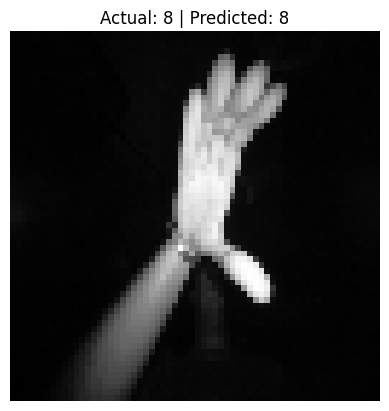

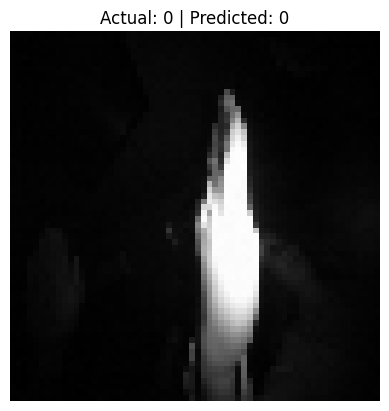

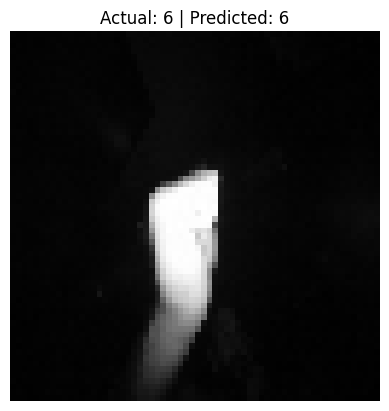

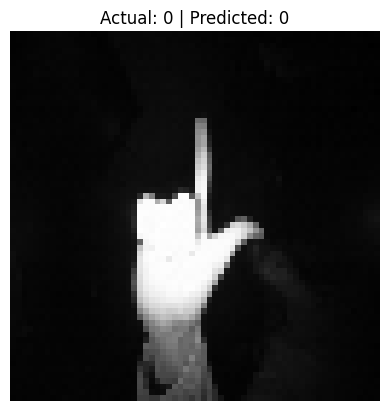

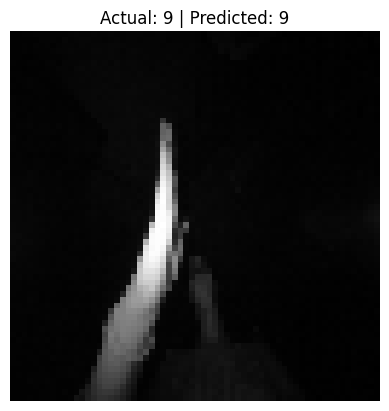

In [25]:
import matplotlib.pyplot as plt

# Pick 5 random samples from the test set
for i in range(5):
    idx = np.random.randint(0, len(X_test))
    img = X_test[idx].reshape(64, 64)
    actual = y_test[idx]
    predicted = model.predict([X_test[idx]])[0]

    plt.imshow(img, cmap='gray')
    plt.title(f"Actual: {actual} | Predicted: {predicted}")
    plt.axis('off')
    plt.show()

/tmp/ipython-input-26-4222973062.py:32: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


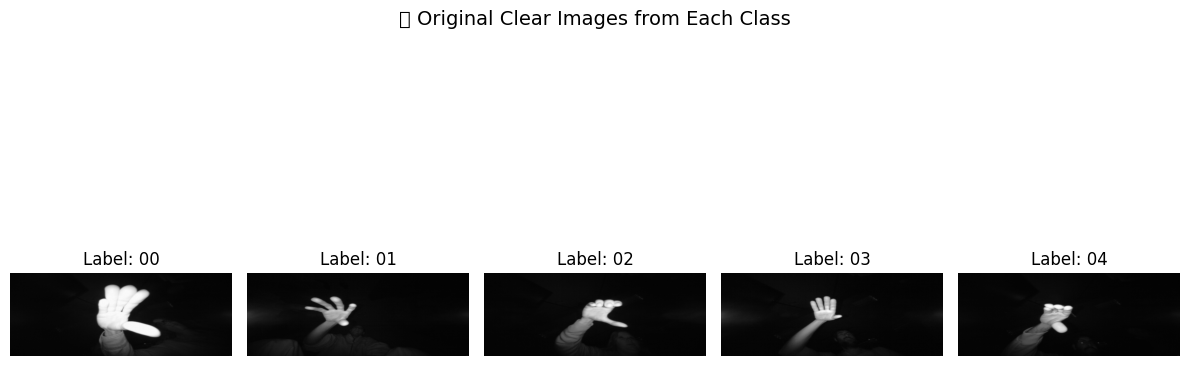

In [26]:
import os
import cv2
import matplotlib.pyplot as plt

# Define base path to the original dataset
base_path = "/content/leapgestrecog/leapGestRecog"

# List of some gesture folders (00 to 09)
folders = sorted(os.listdir(base_path))[:5]  # You can expand this to all folders

# Display 1 image from each of the first few gesture folders
plt.figure(figsize=(12, 6))

for i, folder in enumerate(folders):
    folder_path = os.path.join(base_path, folder)
    if os.path.isdir(folder_path):
        subfolders = os.listdir(folder_path)
        if subfolders:
            subfolder = subfolders[0]
            img_folder = os.path.join(folder_path, subfolder)
            img_files = [f for f in os.listdir(img_folder) if f.endswith('.png')]
            if img_files:
                img_path = os.path.join(img_folder, img_files[0])
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                plt.subplot(1, len(folders), i + 1)
                plt.imshow(img, cmap='gray')
                plt.title(f"Label: {folder}")
                plt.axis('off')

plt.suptitle("🔍 Original Clear Images from Each Class", fontsize=14)
plt.tight_layout()
plt.show()


In [27]:
import matplotlib.pyplot as plt
import cv2
import os

data_dir = "/content/leapgestrecog/leapGestRecog"
labels = sorted(os.listdir(data_dir))[:10]  # '00' to '09'

plt.figure(figsize=(15, 6))

for i, label in enumerate(labels):
    sample_path = os.path.join(data_dir, label)
    img_files = [f for f in os.listdir(sample_path) if f.endswith('.png')]

    if img_files:
        img_path = os.path.join(sample_path, img_files[0])  # first image
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            plt.subplot(2, 5, i + 1)
            plt.imshow(img, cmap='gray')
            plt.title(f"Class {label}")
            plt.axis('off')

plt.suptitle("🖐 One Sample per Hand Gesture Class", fontsize=16)
plt.tight_layout()
plt.show()


<Figure size 1500x600 with 0 Axes>

In [28]:
plt.figure(figsize=(20, 12))

for i, label in enumerate(labels):
    sample_path = os.path.join(data_dir, label)
    img_files = [f for f in os.listdir(sample_path) if f.endswith('.png')][:3]  # first 3 images

    for j, img_file in enumerate(img_files):
        idx = i * 3 + j + 1
        img_path = os.path.join(sample_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is not None:
            plt.subplot(10, 3, idx)
            plt.imshow(img, cmap='gray')
            plt.title(f"Class {label}")
            plt.axis('off')

plt.suptitle("🎯 3 Sample Images per Class", fontsize=18)
plt.tight_layout()
plt.show()


<Figure size 2000x1200 with 0 Axes>

In [29]:
save_dir = "/content/sample_gestures"
os.makedirs(save_dir, exist_ok=True)

for label in labels:
    sample_path = os.path.join(data_dir, label)
    img_files = [f for f in os.listdir(sample_path) if f.endswith('.png')]

    if img_files:
        img_path = os.path.join(sample_path, img_files[0])
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is not None:
            save_path = os.path.join(save_dir, f"class_{label}.png")
            cv2.imwrite(save_path, img)

print("✅ Saved one sample image per class to:", save_dir)


✅ Saved one sample image per class to: /content/sample_gestures


In [30]:
!zip -r sample_gestures.zip sample_gestures/

  adding: sample_gestures/ (stored 0%)
